<a href="https://colab.research.google.com/github/fjpa121197/DataScienceDM/blob/master/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import random #https://pynative.com/python-random-choice/

In [0]:
#Read data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]  #Use transpose to?

In [0]:
def bootstrap_mean(sample,sample_size,n_iterations):

  bst = np.empty(shape=(n_iterations,sample_size))#create a (n_iterations x sample_size array)
  #randomly filled the arrays
  for x in range(n_iterations):
    for y in range(sample_size):
      bst[x][y] = random.choice(sample)
  #Get the mean of each sample
  data_mean_all = []
  for x in range(bst.shape[0]):
    data_mean_all.append(np.mean(bst[x]))
    
  data_mean_all = np.sort(data_mean_all)
  data_mean = np.mean(data_mean_all)

  percentile_low = np.percentile(data_mean_all,2.5)
  percentile_high = np.percentile(data_mean_all,97.5)

  last_array= np.where(data_mean_all > percentile_low,data_mean_all,-1)
  last_array = np.where(last_array < percentile_high,last_array,-1)
  last_array = np.sort(last_array)
  i = 0
  while i > -1:
    if last_array[i] != -1:
      lower = last_array[i]
      break
    i += 1
  upper = last_array[-1]


  return data_mean,lower,upper

In [0]:

# Call your bootstrap function and plot the results
boots = []
for i in range(100, 100000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])



     Boostrap Iterations       Mean  Value
0                    100   9.156429   mean
1                    100   6.928571  lower
2                    100  11.714286  upper
3                   1100   9.195455   mean
4                   1100   6.642857  lower
..                   ...        ...    ...
295                98100   6.500000  lower
296                98100  12.285714  upper
297                99100   9.216837   mean
298                99100   6.500000  lower
299                99100  12.285714  upper

[300 rows x 3 columns]


(0, 100000)

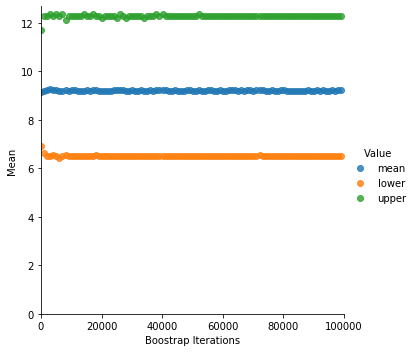

In [97]:
df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
print(df_boot)
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')

In [0]:
def bootstrap_mean_ci(sample,sample_size,n_iterations,ci):

  bst = np.empty(shape=(n_iterations,sample_size))#create a (n_iterations x sample_size array)
  #randomly filled the arrays
  for x in range(n_iterations):
    for y in range(sample_size):
      bst[x][y] = random.choice(sample)
  #Get the mean of each sample
  data_mean_all = []
  for x in range(bst.shape[0]):
    data_mean_all.append(np.mean(bst[x]))
    
  data_mean_all = np.sort(data_mean_all)
  data_mean = np.mean(data_mean_all)

  percentile_low = np.percentile(data_mean_all,((100-ci)/2))
  percentile_high = np.percentile(data_mean_all,(100-((100-ci)/2)))

  last_array= np.where(data_mean_all > percentile_low,data_mean_all,-1)
  last_array = np.where(last_array < percentile_high,last_array,-1)
  last_array = np.sort(last_array)
  i = 0
  while i > -1:
    if last_array[i] != -1:
      lower = last_array[i]
      break
    i += 1
  upper = last_array[-1]


  return data_mean,lower,upper

In [0]:
boots = []
for i in range(100, 100000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

     Boostrap Iterations       Mean  Value
0                    100   8.994286   mean
1                    100   7.357143  lower
2                    100  11.000000  upper
3                   1100   9.163117   mean
4                   1100   7.285714  lower
..                   ...        ...    ...
295                98100   7.357143  lower
296                98100  11.142857  upper
297                99100   9.211199   mean
298                99100   7.357143  lower
299                99100  11.142857  upper

[300 rows x 3 columns]


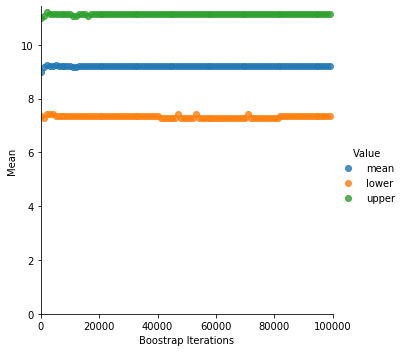

In [102]:
df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")
print(df_boot)
sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')